In [1]:
import nevis
import numpy as np
import matplotlib.pyplot as plt
import math
nevis.download_os_terrain_50()
f = nevis.linear_interpolant()
x_max, y_max = nevis.dimensions()
np.random.seed(1)

Downloaded, unpacked, and processed file already found: Skipping.


In [2]:
# side length of the grid
SIDE = 250
# times of shuffling
N = 80

In [3]:
def make_pairs(s):
    # s is the side length of the square
    xs = np.linspace(0, x_max, math.ceil(x_max / s))
    ys = np.linspace(0, y_max, math.ceil(y_max / s))

    # The Cartesian product of the two lists
    pairs = np.dstack(np.meshgrid(xs, ys)).reshape(-1, 2)
    return pairs

In [4]:
pairs = make_pairs(SIDE)
re_len = len(pairs)

#t = nevis.Timer()
#re_worst = np.array([f(x, y) for x, y in pairs])
#print(t.format())
#print(re_worst.shape)

m = SIDE // 50
t = nevis.Timer()
re_worst = (nevis.gb()[::m, ::m])
re_worst = np.reshape(re_worst, (np.prod(re_worst.shape,)))
print(t.format())
#print(re_worst.shape)

0.02 seconds


In [5]:
t.reset()
re_worst = np.sort(re_worst)
print(t.format())

0.63 seconds


In [6]:
def gen_res(re_worst, method='max'):
    rng = np.random.default_rng()
    random_results = rng.permuted(np.tile(re_worst, (N, 1)), axis=1)
    random_results = (np.maximum if method == 'max' else np.minimum).accumulate(random_results, axis=1)
        
    re_mean = []
    re_0 = []
    re_25 = []
    re_75 = []
    re_100 = []
    for x in random_results.T:
        re_mean.append(np.mean(x))
        sorted_x = np.sort(x)
        re_0.append(sorted_x[0])
        re_25.append(sorted_x[int(len(sorted_x) * 0.25)])
        re_75.append(sorted_x[int(len(sorted_x) * 0.75)])
        re_100.append(sorted_x[-1])

    re_best = np.repeat((np.max if method == 'max' else np.min)(re_worst), re_len)
    print(re_best[0])
    return re_mean, re_0, re_25, re_75, re_100, re_best


In [7]:
t.reset()
re_mean, re_0, re_25, re_75, re_100, re_best = gen_res(re_worst)
print(t.format())
# Output is our heighest

1343.3
4 minutes, 26 seconds


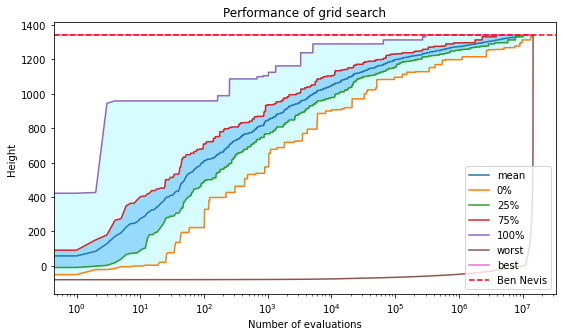

In [8]:
plt.figure(figsize=(9, 5))
plt.xscale('log') # log scale for x axis
plt.plot(re_mean, label='mean')
plt.plot(re_0, label='0%')
plt.plot(re_25, label='25%')
plt.plot(re_75, label='75%')
plt.plot(re_100, label='100%')
plt.plot(re_worst, label='worst')
plt.plot(re_best, label='best')
plt.axhline(y=1344.9, color='r', linestyle='--', label='Ben Nevis')
plt.fill_between(range(len(re_mean)), re_25, re_75, color='#5CA4FA', alpha=0.5)
plt.fill_between(range(len(re_mean)), re_0, re_100, color='#5CF7FA', alpha=0.25)
plt.legend(loc='lower right')
plt.title('Performance of grid search')
plt.xlabel('Number of evaluations')
plt.ylabel('Height')
plt.show()

In [9]:
ben_x, ben_y = nevis.ben().grid
def dist_to_ben(x, y):
    return ((x - ben_x)**2 + (y - ben_y)**2) ** 0.5

distances = np.sort(np.array([dist_to_ben(x, y) for x, y in pairs]))[::-1]

In [10]:
t.reset()
re_mean, re_0, re_25, re_75, re_100, re_best = gen_res(distances, 'min')
print(t.format())
# Output is our closest distance to Ben Nevis

141.54573051587036
3 minutes, 27 seconds


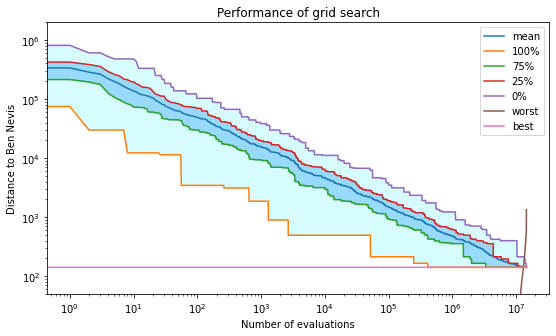

In [13]:
plt.figure(figsize=(9, 5))
plt.xscale('log') # log scale for x axis
plt.yscale('log') # log scale for y axis
plt.plot(re_mean, label='mean')
plt.plot(re_0, label='100%')
plt.plot(re_25, label='75%')
plt.plot(re_75, label='25%')
plt.plot(re_100, label='0%')
plt.plot(re_worst, label='worst')
plt.plot(re_best, label='best')
plt.fill_between(range(len(re_mean)), re_25, re_75, color='#5CA4FA', alpha=0.5)
plt.fill_between(range(len(re_mean)), re_0, re_100, color='#5CF7FA', alpha=0.25)
plt.legend(loc='upper right')
plt.title('Performance of grid search')
plt.xlabel('Number of evaluations')
plt.ylabel('Distance to Ben Nevis')
plt.ylim(50, 2e6)
plt.show()